**<h1 align="center">HAM10000 - Skin Lesion Classification</h1>**
<h2 align="center">COMP9444 - Term 3, 2023</h2>
<h3 align="center">Smashing the Assignment</h3>

<p align="center">Adam Jackson [z5256015], Andar Sitohang [z5424491], Arne Witt [z5523260], Corinna Huo [z5023782], Hongliang Sun [z5254615]</p>

<br>
<br>

**<p align="center">Dataset: Humans Against Machines 10000 </p>**
<p align="center">Objective: To detect Cancerous and Non-cancerous Skin Lesions using Neural Networks</p>
<br>
<br>

**Abstract:**
<br>
<br>
This project endeavors to leverage the capabilities of deep neural networks to analyze and classify skin lesions from the Humans Against Machines 10000 dataset. By training a sophisticated model, the goal is to accurately differentiate between benign and malignant conditions, contributing to advancements in automated medical diagnosis. The dataset HAM10000 was released as a training dataset for machine learning purposes and is publicly accessible via the ISIC (International Skin Imaging Collaboration) archives. The dataset consists of 10015 images which are classified into a collection of the most important diagnostic cases in skin lesions.

---


### **Introduction**

---
Australia's battle against skin cancer, especially melanoma, is a pressing public health concern. With over two-thirds of the Australian population facing a skin cancer diagnosis in their lifetime, the urgency for effective diagnostic tools is paramount. Melanoma, a particularly aggressive form of skin cancer, demonstrates a high survival rate with early detection, emphasizing the critical role of prompt and accurate diagnosis.

In this context, the International Skin Imaging Collaboration's release of the HAM10000 (Human Against Machine with 10,000 training images) dataset marks a significant milestone. This dataset, a comprehensive collection of dermatoscopic images, addresses a critical gap in the availability of diverse and extensive data necessary for the training of neural networks in the automated diagnosis of pigmented skin lesions【7†source】【8†source】【9†source】.

The HAM10000 dataset, encompassing 10,015 dermatoscopic images, was meticulously compiled over two decades from diverse sources, including the Department of Dermatology at the Medical University of Vienna, Austria, and a skin cancer practice in Queensland, Australia. This diverse collection reflects varied patient demographics and includes a wide range of pigmented skin lesions, providing a rich resource for academic and clinical research【15†source】【16†source】.

Crucially, the dataset not only offers a voluminous collection of images but also presents a standardized approach to the classification of skin lesions. It categorizes lesions into seven primary diagnostic categories, encompassing over 95% of pigmented lesions encountered in clinical practice. This standardization is vital for both training automated systems and for benchmark comparisons with human diagnostic accuracy【17†source】.

The rigor in the dataset's preparation is evident. Each image underwent a meticulous screening and validation process to ensure the exclusion of non-relevant or low-quality images. This attention to detail ensures the dataset's utility in training robust and accurate machine learning models for lesion diagnosis【18†source】.

All images and accompanying metadata in the HAM10000 dataset are accessible through the Harvard Dataverse and the ISIC-archive, facilitating widespread use and research application【19†source】. The dataset's composition reflects real-world clinical settings, including the challenges of diagnosing lesions in chronically sun-damaged skin, a common scenario in Australian patients【20†source】.

**Aim of the Project Report**

This report aims to conduct an in-depth literature review of the various studies utilizing the HAM10000 dataset, focusing on how these studies have approached the classification and diagnosis of skin lesions. The report will explore different neural network architectures and pre-processing techniques applied to the dataset, assessing their efficacy and impact on the accuracy of lesion classification.

Furthermore, the project will aim to build upon previous research findings, utilizing the HAM10000 dataset to enhance the early detection and classification of skin cancer. By analyzing and comparing different methodologies, this report seeks to contribute to the ongoing efforts in developing more accurate and efficient diagnostic tools for skin cancer, leveraging the potential of machine learning and AI in healthcare.

In conclusion, the HAM10000 dataset stands as a testament to the collaborative efforts in the medical and AI communities, striving towards the early detection and effective treatment of skin cancer. This report will delve into the nuances of these efforts, evaluating the progress made and the potential for future advancements in this vital field of research.

---

### **Data Sources**

---

### **Literature Review**

### **Preprocessing**

Preprocessing explanation

#### **Step 1:** Import libraries

In [1]:
import os
import random

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from barbar import Bar
from ignite.metrics import Accuracy
from shutil import copyfile
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score)
from torch.utils.tensorboard import SummaryWriter
from torchinfo import summary
from torchvision import datasets, transforms
from tqdm import tqdm


/home/administrator/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-10 02:58:22.850213: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-10 02:58:22.875816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 02:58:23.276534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### **Step 2:** Parsing the raw data

In [2]:
# Dataset is downloaded into local working directory in a file labelled as 'data'
os.listdir('data')

['HAM10000_metadata.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_28_28_L.csv',
 'HAM10000_images_part_2',
 'HAM10000_images_part_1',
 'hmnist_8_8_RGB.csv',
 'ham10000_images_part_2',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv']

In [3]:
# Load the contents of the data directory into a dataframe
data = pd.read_csv('data/HAM10000_metadata.csv')

# Print the value counts for the 'dx' column
print(f"The values found in the dx column are: \n{data['dx'].value_counts()}")

# number of classes
print(f"\nThe number of classes found is {data['dx'].nunique()}")

The values found in the dx column are: 
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

The number of classes found is 7


#### **Step 3:** Split Dataset into Training/Validation

Splits the data from the source directory (data) into training and validation datasets

In [4]:
def split_data(source, training, validation, split_size):
    """
    Splits the data from the source directory into training and validation datasets.

    Parameters:
    source (str): The path to the source directory containing files to split.
    training (str): The path to the training directory where training files will be copied.
    validation (str): The path to the validation directory where validation files will be copied.
    split_size (float): The proportion of the dataset to be used as the training set.
    """
    
    # Initialise a list to hold the names of valid files
    files = []
    
    # Loop over each file in the source directory
    for filename in os.listdir(source):
        file = os.path.join(source, filename)
        
        # Check if the file is non-empty
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            # If the file is empty, print a warning and ignore it
            print(filename + " is zero length, so ignoring.")
    
    # Determine the number of files to include in the training set
    training_length = int(len(files) * split_size)
    
    # Determine the number of files to include in the validation set
    validation_length = int(len(files) - training_length)
    
    # Shuffles the file list randomly
    shuffled_set = random.sample(files, len(files))
    
    # Split the files into training and validation sets
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[-validation_length:]
    
    # Copy the training files to the training directory
    for filename in training_set:
        this_file = os.path.join(source, filename)
        destination = os.path.join(training, filename)
        copyfile(this_file, destination)
    
    # Copy the validation files to the validation directory
    for filename in validation_set:
        this_file = os.path.join(source, filename)
        destination = os.path.join(validation, filename)
        copyfile(this_file, destination)


Creates folders for the dataset (if they don't already exist)

In [5]:
try:
    # Attempt to create a directory for storing models related to skin analysis
    os.mkdir('skin_models/')
    
    # Create a root directory for HAM10000 dataset
    os.mkdir('HAM10000')
    
    # Create a directory for original dataset images with subdirectories for each class
    os.mkdir('orig/')
    os.mkdir('orig/0.MEL/')     # For Melanoma
    os.mkdir('orig/1.NV/')      # For Melanocytic nevi
    os.mkdir('orig/2.BCC/')     # For Basal cell carcinoma
    os.mkdir('orig/3.AKIEC/')   # For Actinic keratoses and intraepithelial carcinoma
    os.mkdir('orig/4.BKL/')     # For Benign keratosis
    os.mkdir('orig/5.DF/')      # For Dermatofibroma
    os.mkdir('orig/6.VASC/')    # For Vascular lesions
    
    # Create a main directory for processed skin images with subdirectories for training and validation sets
    os.mkdir('skin/')
    
    # Create subdirectories for training and validation sets within the 'skin' directory
    os.mkdir('skin/training/')
    os.mkdir('skin/validation/')
    
    # Create class-specific subdirectories within the training directory
    os.mkdir('skin/training/0.MEL/')     
    os.mkdir('skin/training/1.NV/')     
    os.mkdir('skin/training/2.BCC/')     
    os.mkdir('skin/training/3.AKIEC/')   
    os.mkdir('skin/training/4.BKL/')     
    os.mkdir('skin/training/5.DF/')      
    os.mkdir('skin/training/6.VASC/')    
    
    # Create class-specific subdirectories within the validation directory
    os.mkdir('skin/validation/0.MEL/')   
    os.mkdir('skin/validation/1.NV/')   
    os.mkdir('skin/validation/2.BCC/')   
    os.mkdir('skin/validation/3.AKIEC/') 
    os.mkdir('skin/validation/4.BKL/')  
    os.mkdir('skin/validation/5.DF/')    
    os.mkdir('skin/validation/6.VASC/') 

except Exception as e:
    # If there is any exception (e.g., folders already exist), print the error message
    print(f'An error occurred: {e}')


In [6]:
# Define the path to the root directory of the original HAM10000 dataset
orig_all = 'HAM10000/'

# Define the paths to the source directories for each skin lesion category in the original dataset
source_MEL = 'orig/0.MEL/'  
source_NV = 'orig/1.NV/'     
source_BCC = 'orig/2.BCC/'   
source_AKIEC = 'orig/3.AKIEC/'
source_BKL = 'orig/4.BKL/'   
source_DF = 'orig/5.DF/'      
source_VASC = 'orig/6.VASC/'  

# Define the paths to the training directories for each skin lesion category
training_MEL = 'skin/training/0.MEL/'   
training_NV = 'skin/training/1.NV/'       
training_BCC = 'skin/training/2.BCC/'     
training_AKIEC = 'skin/training/3.AKIEC/' 
training_BKL = 'skin/training/4.BKL/'      
training_DF = 'skin/training/5.DF/'       
training_VASC = 'skin/training/6.VASC/'    

# Define the paths to the validation directories for each skin lesion category
validation_MEL = 'skin/validation/0.MEL/'  
validation_NV = 'skin/validation/1.NV/'   
validation_BCC = 'skin/validation/2.BCC/' 
validation_AKIEC = 'skin/validation/3.AKIEC/' 
validation_BKL = 'skin/validation/4.BKL/'  
validation_DF = 'skin/validation/5.DF/'    
validation_VASC = 'skin/validation/6.VASC/'


Loads the two filepaths of the HAM10000 dataset and moves the dataset into HAM10000 folder

In [7]:
# Define paths to the two parts of the HAM10000 images dataset
part1 = "data/HAM10000_images_part_1"
part2 = "data/HAM10000_images_part_2"

# Create a list of the two parts for iteration
dataset_parts = [part1, part2]

# Target directory where all images from both parts will be consolidated
target_directory = 'HAM10000'

# Iterate over each part of the dataset
for part in dataset_parts:
    # List all files in the current part and wrap with a tqdm progress bar
    for img in tqdm(os.listdir(part), desc=f"Processing {os.path.basename(part)}"):
        # Create the full source path for the image
        source_path = os.path.join(part, img)
        
        # Create the full destination path for the image
        destination_path = os.path.join(target_directory, img)
        
        # Check if the file does not already exist at the destination
        if not os.path.exists(destination_path):
            # Copy the file from the source to the destination
            copyfile(source_path, destination_path)
        else:
            # Optionally print a message if the file already exists
            print(f"File {img} already exists, skipping copy.")

Processing HAM10000_images_part_2: 100%|██████████| 5015/5015 [00:00<00:00, 7923.28it/s]


In [8]:
print(f"The data is summarised as shown below:\n-----------------------------------------------\n")

print(f"The columns of the data are: \n{data.columns}\n")

print(f"The number of items in the dataset is: {len(data)}\n\n")

print(data)

The data is summarised as shown below:
-----------------------------------------------

The columns of the data are: 
Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

The number of items in the dataset is: 10015


         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male  

#### **Step 4:** Dataset Cleanup

Duplicate photos are removed based on duplicate lesion_id, to make sure that all the photos are independent and identically distributed. This will help mitigate overfitting in the trained model.

In [9]:
data = data.drop_duplicates(subset='lesion_id')
print(f"New size of dataset after dropping duplicates: {len(data)}")

New size of dataset after dropping duplicates: 7470


In [10]:
image_names = [x for x in data['image_id']]
diagnosis = [x for x in data['dx']]

In [11]:
print(len(image_names))
print(len(diagnosis))

7470
7470


In [12]:
print(image_names[0])
print(diagnosis[0])

ISIC_0027419
bkl


In [13]:
pd.unique(data['dx'])

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

#### **Step 5:** Organise Dataset into their respective Class

Iterates over the list of image names and corresponding diagosis, and copies them into their respective class.

In [14]:
for index, image in tqdm(enumerate(image_names)):

    # Add the file extension '.jpg' to each image name
    image = image + '.jpg'
    
    # Check the diagnosis and copy the image to the corresponding directory
    if diagnosis[index] == 'mel':
        # If diagnosis is 'mel'
        copyfile(os.path.join(orig_all, image), os.path.join(source_MEL, image))
    elif diagnosis[index] == 'nv':
        # If diagnosis is 'nv'
        copyfile(os.path.join(orig_all, image), os.path.join(source_NV, image))
    elif diagnosis[index] == 'bcc': 
        # If diagnosis is 'bcc'
        copyfile(os.path.join(orig_all, image), os.path.join(source_BCC, image))
    elif diagnosis[index] == 'akiec': 
        # If diagnosis is 'akiec'
        copyfile(os.path.join(orig_all, image), os.path.join(source_AKIEC, image))
    elif diagnosis[index] == 'bkl':
        # If diagnosis is 'bkl'
        copyfile(os.path.join(orig_all, image), os.path.join(source_BKL, image))
    elif diagnosis[index] == 'df':  
        # If diagnosis is 'df'
        copyfile(os.path.join(orig_all, image), os.path.join(source_DF, image))
    elif diagnosis[index] == 'vasc': 
        # If diagnosis is 'vasc'
        copyfile(os.path.join(orig_all, image), os.path.join(source_VASC, image))

7470it [00:00, 8166.25it/s]


The number of pictures in each class is heavily imbalanced. In order to address this issue, the dataset will under preprocessing and data augmentation in the next step.

In [15]:
# Split each individual class of photos into training and validation with a 80-20 split

split_size = 0.8
split_data(source_MEL, training_MEL, validation_MEL, split_size)
split_data(source_NV, training_NV, validation_NV, split_size)
split_data(source_BCC, training_BCC, validation_BCC, split_size)
split_data(source_AKIEC, training_AKIEC, validation_AKIEC, split_size)
split_data(source_BKL, training_BKL, validation_BKL, split_size)
split_data(source_DF, training_DF, validation_DF, split_size)
split_data(source_VASC, training_VASC, validation_VASC, split_size)

In [16]:
# Helper function to print out the number of training and validation images for each disease
def print_counts(training_dir, validation_dir, disease_name):
    train_count = len(os.listdir(training_dir))
    val_count = len(os.listdir(validation_dir))
    print(f"{disease_name.upper():<20}| {train_count:<5} training images | {val_count:<5} validation images")


# Printing the counts for each condition
print_counts(training_MEL, validation_MEL, 'Melanoma')
print_counts(training_NV, validation_NV, 'Melanocytic nevi')
print_counts(training_BCC, validation_BCC, 'Basal cell carcinoma')
print_counts(training_AKIEC, validation_AKIEC, 'Actinic keratoses')
print_counts(training_BKL, validation_BKL, 'Benign keratosis')
print_counts(training_DF, validation_DF, 'Dermatofibroma')
print_counts(training_VASC, validation_VASC, 'Vascular lesions')


MELANOMA            | 491   training images | 123   validation images
MELANOCYTIC NEVI    | 4322  training images | 1081  validation images
BASAL CELL CARCINOMA| 261   training images | 66    validation images
ACTINIC KERATOSES   | 182   training images | 46    validation images
BENIGN KERATOSIS    | 581   training images | 146   validation images
DERMATOFIBROMA      | 58    training images | 15    validation images
VASCULAR LESIONS    | 78    training images | 20    validation images


In [17]:
traindir = r'skin/training/'
valdir = r'skin/validation/'

#### **Step 6:** Data Augmentation 

Data Augmentation is a technique to increase the diversity in training set by applying random (but realistic) transformations. This method is used to address the imbalance of dataset samples in each class as seen above.

#### Challenge:
Currently, the dataset consists of 7470 unique skin neoplasm photos with height=450 and width=600 pixels.
- After analyzing the images, we observed that in most cases, the skin neoplasm is positioned at the center and occupies the central 450x450 portion of the image, with only a few exceptions. Therefore, we conclude that there is no need to compress the photos along the width axis, which might result in the loss of important details, as our primary subject of interest is nearly always within the central crop. Therefore for Resnet-50 to work, need to make it 240x240.

#### Solution:
- Resnet-50 requires input images to be of size 224 × 224, we will first resize to 224x280 to avoid loss of info on width axis and then crop to 224x224 piece.
- Apply Random rotation and Horizontal/Vertical flipping. Since skin neoplasms can be in a lot of different shapes, by rotating and horizontally flipping them we will still get skin neoplasms that we would expect our model to classify correctly. These two transformations will help our model greatly. They will inflate our dataset, increase model robustness (especially since we have some classes with very small representation), help with better generalization and overfitting prevention.

In [18]:
# Defines the transformations to be applied to the training and validation sets
train_transforms = transforms.Compose([
    # Resize to 224 x 280 pixels
    transforms.Resize((224, 280)),
    # Crops image to 224 x 224
    transforms.CenterCrop((224, 224)),
    # Randomly flip image horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Randomly rotate image by up to 180 degrees
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    # Converts image to tensor
    transforms.ToTensor(),
    # Normalises image tensor with mean and standard deviation of ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Defines the transformations to be applied to the validation set
val_transforms = transforms.Compose([
    # Resize to 224 x 280 pixels
    transforms.Resize((224, 280)),
    # Crops image to 224 x 224
    torchvision.transforms.CenterCrop((224, 224)),
    # Converts image to tensor
    transforms.ToTensor(),
    # Normalises image tensor with mean and standard deviation of ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Load the training and validation sets
train_dataset = datasets.ImageFolder(
    traindir, transform=train_transforms)

val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

In [19]:
# Creates a DataLoader for the training set
train_loader = torch.utils.data.DataLoader(
    # Passes the training dataset to the DataLoader
    train_dataset, 
    # Sets the batch size to 64
    batch_size=128, 
    # Shuffles the dataset
    shuffle=True,
    # Sets the pin_memory parameter to False
    pin_memory=False, 
    # Sets the drop_last parameter to False
    drop_last=False)

# Creates a DataLoader for the validation set
val_loader = torch.utils.data.DataLoader(
    # Passes the validation dataset to the DataLoader
    val_dataset, 
    # Sets the batch size to 64
    batch_size=128, 
    # Shuffles the dataset
    shuffle=True,
    # Sets the pin_memory parameter to False
    pin_memory=False,
    # Sets the drop_last parameter to False
    drop_last=False)

In [20]:
# Verify the mappings of class names to index is correct for both train and validation sets
print(val_dataset.class_to_idx)
print(train_dataset.class_to_idx)

{'0.MEL': 0, '1.NV': 1, '2.BCC': 2, '3.AKIEC': 3, '4.BKL': 4, '5.DF': 5, '6.VASC': 6}
{'0.MEL': 0, '1.NV': 1, '2.BCC': 2, '3.AKIEC': 3, '4.BKL': 4, '5.DF': 5, '6.VASC': 6}


### **Model 1: VGG16**

#### Literature Review 

Prepare for training by specifying the hardware, model architecture, and tools for logging and optimisation.

In [21]:
!nvidia-smi
torch.cuda.is_available()

Fri Nov 10 02:59:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A4500    On   | 00000000:01:00.0 Off |                  Off |
| 30%   34C    P8    15W / 200W |    189MiB / 20470MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [22]:
torch.cuda.empty_cache()

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = torchvision.models.vgg16(pretrained=True).to(device)

model.classifier[6] = nn.Linear(4096, 7).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.0001)

epochs = 400 # 200 or 250 or 300

writer = SummaryWriter(log_dir='skin_logs/', filename_suffix="skin50")

/home/administrator/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/administrator/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Custom Class for Training

Creates a custom class that helps prevent overfitting by stopping the training process if the validation loss does not decrease for a number of epochs defined by the patience parameter. Save the model with the best validation loss

In [24]:
class EarlyStopping:
    """
    Early Stopping to stop training when a monitored quantity has stopped improving.
    """
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Initialises Early Stopping object

        Parameters:
        patience (int): Number of epochs with no improvement after which training will be stopped.
        verbose (bool): If True, prints a message for each epoch where there is no improvement.
        delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        path (str): Path to the checkpoint file.
        trace_func (function): Function to trace the message printed.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        """
        Method that compares the validation loss with best score, and saves the model if validation loss is lower than the best score by at least delta.

        Parameters:
        val_loss (float): The validation loss.
        model (PyTorch model): The PyTorch model to save.
        """
        score = -val_loss

        # First iteration, save the current model as best model# First iteration, save the current model as best model
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)

        # If the score did not improve, increment counter
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        
        # Update model as best if score improved
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """
        Saves the model when the validation loss decreases

        Parameters:
        val_loss (float): The validation loss.
        model (PyTorch model): The PyTorch model to save.
        """
        # If verbose, print a message
        if self.verbose:
            self.trace_func(f'Monitored metric has improved ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # Save model to specified path
        torch.save(model.state_dict(), f'skin_models/skinmodel50.pt') 
        # Update minimum validation loss
        self.val_loss_min = val_loss


#### Train the Model

In [25]:
early_stopping = EarlyStopping(patience=30, verbose=True)

for epoch in range(epochs):
    train_loss = 0.00
    val_loss = 0.00
    train_accuracy = Accuracy()
    val_accuracy = Accuracy()
    print(f'Epoch {epoch+1}')

    # Training loop
    for idx, (inputs, labels) in enumerate(Bar(train_loader)):
        model.train()
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        train_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Train Accuracy: {train_accuracy.compute()}")
    train_loss /= len(train_loader)
    train_loss_formated = "{:.4f}".format(train_loss)

    # Validation loop
    with torch.no_grad():
        for inputs, labels in val_loader:
            model.eval()           
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Val Accuracy: {val_accuracy.compute()}")
    val_loss /= len(val_loader)
    val_loss_formated = "{:.4f}".format(val_loss)
    print(f'Training Loss: {train_loss_formated}')
    print(f"Validation Loss: {val_loss_formated}")

    # TensorBoard writer 
    writer.add_scalar('Loss/train', train_loss, epoch+1)
    writer.add_scalar('Loss/val', val_loss, epoch+1)
    writer.add_scalar('Accuracy/train', train_accuracy.compute(), epoch+1)
    writer.add_scalar('Accuracy/val', val_accuracy.compute(), epoch+1)

    # Early Stopping
    early_stopping(val_loss, model)       
    if early_stopping.early_stop:
        print("Early stopping")
        break
        
# load the last checkpoint with the best model
model.load_state_dict(torch.load('skin_models/skinmodel50.pt'))

Epoch 1
5973/5973: [===============================>] - ETA 2.3sss
Train Accuracy: 0.6842457726435627
Val Accuracy: 0.7221108884435538
Training Loss: 1.3735
Validation Loss: 0.8412
Monitored metric has improved (inf --> 0.841238).  Saving model ...
Epoch 2
5973/5973: [===============================>] - ETA 1.3ss
Train Accuracy: 0.7264356269881131
Val Accuracy: 0.7381429525718103
Training Loss: 0.8409
Validation Loss: 0.7908
Monitored metric has improved (0.841238 --> 0.790774).  Saving model ...
Epoch 3
5973/5973: [===============================>] - ETA 1.1ss
Train Accuracy: 0.7324627490373347
Val Accuracy: 0.7394789579158316
Training Loss: 0.8131
Validation Loss: 0.7815
Monitored metric has improved (0.790774 --> 0.781467).  Saving model ...
Epoch 4
5973/5973: [===============================>] - ETA 1.1ss
Train Accuracy: 0.7393269713711703
Val Accuracy: 0.7434869739478958
Training Loss: 0.7621
Validation Loss: 0.7200
Monitored metric has improved (0.781467 --> 0.720022).  Saving mo

<All keys matched successfully>

              precision    recall  f1-score   support

         MEL       0.57      0.28      0.38       123
          NV       0.90      0.96      0.92      1081
         BCC       0.64      0.79      0.71        66
       AKIEC       0.46      0.54      0.50        46
         BKL       0.66      0.58      0.62       146
          DF       0.25      0.07      0.11        15
        VASC       0.88      0.75      0.81        20

    accuracy                           0.83      1497
   macro avg       0.62      0.57      0.58      1497
weighted avg       0.82      0.83      0.82      1497

AUC of class MEL = 0.9005100531354657
AUC of class NV = 0.9543224756279799
AUC of class BCC = 0.981714418821337
AUC of class AKIEC = 0.9601474245647679
AUC of class BKL = 0.9455248775640571
AUC of class DF = 0.9240665766981557
AUC of class VASC = 0.9952945159106297


/tmp/ipykernel_69352/208948853.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)


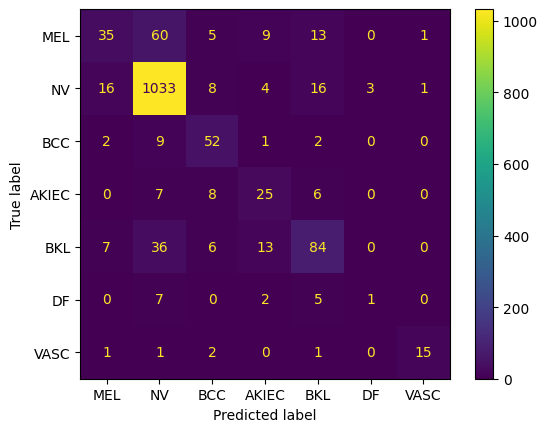

In [26]:
# Set the number of classes to 7 (the number of skin conditions)
num_classes = 7

# Initialise empty tensors to store the predictions and labels
predlist = torch.zeros(0,dtype=torch.long, device='cpu')
lbllist = torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')

# Evaluate the model on the validation set
with torch.no_grad():

    # Loop over each batch in the validation set
    for i, (inputs, classes) in enumerate(val_loader):

        # Set model to evaluation mode
        model.eval()

        # Move inputs and classes to device
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

        # Apply softmax to the outputs
        predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])

# Convert predictions and labels to numpy arrays
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy()

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)

# Print the AUC for each class
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### Train Model with better Validation Robustness.
We plan to make spin validation dataset with random rotations and horizontal flip and then check the metrics again.

In [27]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 280)),
    torchvision.transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

              precision    recall  f1-score   support

         MEL       0.57      0.25      0.34       615
          NV       0.89      0.95      0.92      5405
         BCC       0.67      0.75      0.71       330
       AKIEC       0.47      0.51      0.49       230
         BKL       0.64      0.62      0.63       730
          DF       0.09      0.03      0.04        75
        VASC       0.76      0.82      0.79       100

    accuracy                           0.83      7485
   macro avg       0.59      0.56      0.56      7485
weighted avg       0.81      0.83      0.81      7485

AUC of class MEL = 0.9049381664122318
AUC of class NV = 0.9529583096136057
AUC of class BCC = 0.9804739216059971
AUC of class AKIEC = 0.9520396727893807
AUC of class BKL = 0.9434799184774343
AUC of class DF = 0.9298533513270356
AUC of class VASC = 0.990070412999323


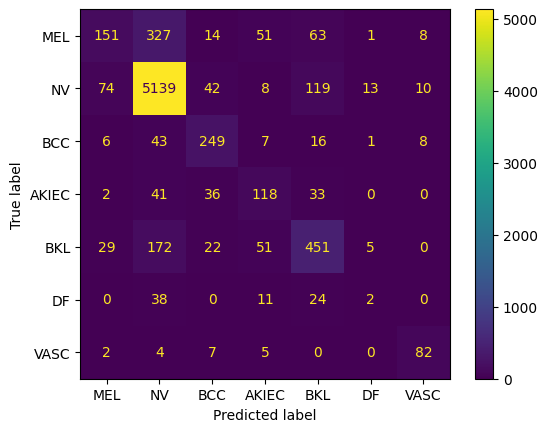

In [28]:
num_classes = 7

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
for n in range(5):
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(val_loader):
            model.eval()
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist=torch.cat([predlist,preds.view(-1).cpu()])
            lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
            predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy() 

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

### **Model 2: ResNet50**

Prepare for training by specifying the hardware, model architecture, and tools for logging and optimisation.

In [23]:
!nvidia-smi

torch.cuda.is_available()

Thu Nov  9 22:46:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A4500    On   | 00000000:01:00.0 Off |                  Off |
| 30%   32C    P8    15W / 200W |    189MiB / 20470MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = torchvision.models.resnet50(pretrained=True).to(device)

model.fc = nn.Linear(2048, 7).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.0001)

epochs = 250 # 200 or 250 or 300

writer = SummaryWriter(log_dir='skin_logs/', filename_suffix="skin50")

/home/administrator/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/administrator/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Custom Class for Training

Creates a custom class that helps prevent overfitting by stopping the training process if the validation loss does not decrease for a number of epochs defined by the patience parameter. Save the model with the best validation loss

In [27]:
class EarlyStopping:
    """
    Early Stopping to stop training when a monitored quantity has stopped improving.
    """
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Initialises Early Stopping object

        Parameters:
        patience (int): Number of epochs with no improvement after which training will be stopped.
        verbose (bool): If True, prints a message for each epoch where there is no improvement.
        delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        path (str): Path to the checkpoint file.
        trace_func (function): Function to trace the message printed.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        """
        Method that compares the validation loss with best score, and saves the model if validation loss is lower than the best score by at least delta.

        Parameters:
        val_loss (float): The validation loss.
        model (PyTorch model): The PyTorch model to save.
        """
        score = -val_loss

        # First iteration, save the current model as best model# First iteration, save the current model as best model
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)

        # If the score did not improve, increment counter
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        
        # Update model as best if score improved
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """
        Saves the model when the validation loss decreases

        Parameters:
        val_loss (float): The validation loss.
        model (PyTorch model): The PyTorch model to save.
        """
        # If verbose, print a message
        if self.verbose:
            self.trace_func(f'Monitored metric has improved ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # Save model to specified path
        torch.save(model.state_dict(), f'skin_models/skinmodel50.pt') 
        # Update minimum validation loss
        self.val_loss_min = val_loss


#### Train the Model

In [26]:
early_stopping = EarlyStopping(patience=30, verbose=True)

for epoch in range(epochs):
    train_loss = 0.00
    val_loss = 0.00
    train_accuracy = Accuracy()
    val_accuracy = Accuracy()
    print(f'Epoch {epoch+1}')

    # Training loop
    for idx, (inputs, labels) in enumerate(Bar(train_loader)):
        model.train()
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        train_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Train Accuracy: {train_accuracy.compute()}")
    train_loss /= len(train_loader)
    train_loss_formated = "{:.4f}".format(train_loss)

    # Validation loop
    with torch.no_grad():
        for inputs, labels in val_loader:
            model.eval()           
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Val Accuracy: {val_accuracy.compute()}")
    val_loss /= len(val_loader)
    val_loss_formated = "{:.4f}".format(val_loss)
    print(f'Training Loss: {train_loss_formated}')
    print(f"Validation Loss: {val_loss_formated}")

    # TensorBoard writer 
    writer.add_scalar('Loss/train', train_loss, epoch+1)
    writer.add_scalar('Loss/val', val_loss, epoch+1)
    writer.add_scalar('Accuracy/train', train_accuracy.compute(), epoch+1)
    writer.add_scalar('Accuracy/val', val_accuracy.compute(), epoch+1)

    # Early Stopping
    early_stopping(val_loss, model)       
    if early_stopping.early_stop:
        print("Early stopping")
        break
        
# load the last checkpoint with the best model
model.load_state_dict(torch.load('skin_models/skinmodel50.pt'))

Epoch 1
5973/5973: [===============================>] - ETA 1.5sss
Train Accuracy: 0.7381550309727105
Val Accuracy: 0.7247828991315965
Training Loss: 0.7617
Validation Loss: 1.0684
Monitored metric has improved (inf --> 1.068386).  Saving model ...
Epoch 2
5973/5973: [===============================>] - ETA 0.4ss
Train Accuracy: 0.7726435626988113
Val Accuracy: 0.7775551102204409
Training Loss: 0.6339
Validation Loss: 0.6414
Monitored metric has improved (1.068386 --> 0.641364).  Saving model ...
Epoch 3
5973/5973: [===============================>] - ETA 0.5ss
Train Accuracy: 0.7796752050895698
Val Accuracy: 0.7695390781563126
Training Loss: 0.5974
Validation Loss: 0.6125
Monitored metric has improved (0.641364 --> 0.612461).  Saving model ...
Epoch 4
5973/5973: [===============================>] - ETA 0.5ss
Train Accuracy: 0.7927339695295497
Val Accuracy: 0.7895791583166333
Training Loss: 0.5788
Validation Loss: 0.5949
Monitored metric has improved (0.612461 --> 0.594890).  Saving mo

<All keys matched successfully>

              precision    recall  f1-score   support

         MEL       0.55      0.53      0.54       123
          NV       0.92      0.95      0.93      1081
         BCC       0.64      0.70      0.67        66
       AKIEC       0.51      0.59      0.55        46
         BKL       0.72      0.55      0.63       146
          DF       0.60      0.20      0.30        15
        VASC       0.86      0.90      0.88        20

    accuracy                           0.85      1497
   macro avg       0.68      0.63      0.64      1497
weighted avg       0.84      0.85      0.84      1497

AUC of class MEL = 0.9267109264979113
AUC of class NV = 0.9594993061979649
AUC of class BCC = 0.9828367532770048
AUC of class AKIEC = 0.9735265034608815
AUC of class BKL = 0.938244628534926
AUC of class DF = 0.9612235717498876
AUC of class VASC = 0.9967840216655384


/tmp/ipykernel_66705/208948853.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)


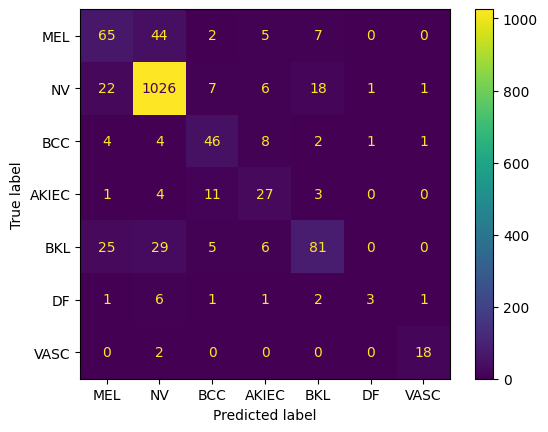

In [28]:
# Set the number of classes to 7 (the number of skin conditions)
num_classes = 7

# Initialise empty tensors to store the predictions and labels
predlist = torch.zeros(0,dtype=torch.long, device='cpu')
lbllist = torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')

# Evaluate the model on the validation set
with torch.no_grad():

    # Loop over each batch in the validation set
    for i, (inputs, classes) in enumerate(val_loader):

        # Set model to evaluation mode
        model.eval()

        # Move inputs and classes to device
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

        # Apply softmax to the outputs
        predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])

# Convert predictions and labels to numpy arrays
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy()

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)

# Print the AUC for each class
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### Train Model with better Validation Robustness.
We plan to make spin validation dataset with random rotations and horizontal flip and then check the metrics again.

In [33]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 280)),
    torchvision.transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

              precision    recall  f1-score   support

         MEL       0.96      0.88      0.92       615
          NV       0.98      1.00      0.99      5405
         BCC       0.95      0.99      0.97       330
       AKIEC       0.95      0.93      0.94       230
         BKL       0.98      0.95      0.97       730
          DF       1.00      0.97      0.99        75
        VASC       1.00      1.00      1.00       100

    accuracy                           0.98      7485
   macro avg       0.97      0.96      0.97      7485
weighted avg       0.98      0.98      0.98      7485

AUC of class MEL = 0.9983195465142426
AUC of class NV = 0.9994088450864584
AUC of class BCC = 0.9999474832179235
AUC of class AKIEC = 0.9994594432625177
AUC of class BKL = 0.99921924905955
AUC of class DF = 1.0
AUC of class VASC = 1.0


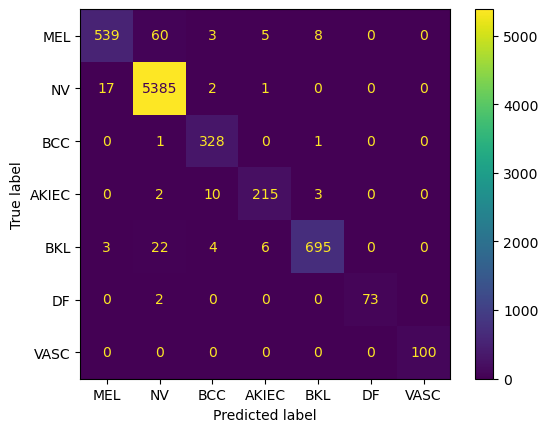

In [34]:
num_classes = 7

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
for n in range(5):
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(val_loader):
            model.eval()
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist=torch.cat([predlist,preds.view(-1).cpu()])
            lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
            predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy() 

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### **Summary:**
- In the end we were able to achieve 99% average F1 score for each class, and AUCs close to 100%!
- We could see that even on 2 classes with smallest representations (only 78 and 58 training images) we still were able to achieve 100 F1 score in both cases.
- We believe that the most important reason for the perfect result is well chosen data augmentations that helped not only to enrich our dataset, but also prevent overfitting.

#### **References:**
- https://datagen.tech/guides/computer-vision/resnet-50/
- https://viso.ai/deep-learning/resnet-residual-neural-network/
- https://www.kaggle.com/code/pmigdal/transfer-learning-with-resnet-50-in-pytorch

### **Model 3: Self-Defined Model**
Define the criterion, optimizer, epochs, and writer.

In [28]:
class PaperModel(nn.Module):
    # two convolutional layers and one fully connected layer,
    # all using relu, followed by log_softmax
    def __init__(self):
        super(PaperModel, self).__init__()
        self.init_channels = 16
        self.kernel_size = (6, 6)
        self.main_2d = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=self.init_channels,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels,
                out_channels=self.init_channels * 2,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels * 2,
                out_channels=self.init_channels * 4,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels * 4,
                out_channels=self.init_channels * 8,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels * 8,
                out_channels=self.init_channels * 16,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
        )
        self.main_1d = nn.Sequential(
            nn.Linear(in_features=256 * 4, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=7),
        )

    def forward(self, x):
        x = self.main_2d(x)
        x = torch.flatten(x, start_dim=1)
        x = self.main_1d(x)
        return x

In [29]:
device = 'cuda'

model = PaperModel().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.0001)

epochs = 170

writer = SummaryWriter(log_dir='skin_logs/', filename_suffix="skin50")

In [30]:
# Shows info about model
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 219, 219]           1,744
              ReLU-2         [-1, 16, 219, 219]               0
         MaxPool2d-3         [-1, 16, 109, 109]               0
            Conv2d-4         [-1, 32, 104, 104]          18,464
              ReLU-5         [-1, 32, 104, 104]               0
         MaxPool2d-6           [-1, 32, 52, 52]               0
            Conv2d-7           [-1, 64, 47, 47]          73,792
              ReLU-8           [-1, 64, 47, 47]               0
         MaxPool2d-9           [-1, 64, 23, 23]               0
           Conv2d-10          [-1, 128, 18, 18]         295,040
             ReLU-11          [-1, 128, 18, 18]               0
        MaxPool2d-12            [-1, 128, 9, 9]               0
           Conv2d-13            [-1, 256, 4, 4]       1,179,904
             ReLU-14            [-1, 25

#### Step 9: Define a class to early stops the training if validation loss does not improve after a given patience.

In [31]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when monitored metric decrease.'''
        if self.verbose:
            self.trace_func(f'Monitored metric has improved ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), f'skin_models/papermodel.pt') 
        self.val_loss_min = val_loss


#### Step 10: Train the Model

In [32]:
early_stopping = EarlyStopping(patience=30, verbose=True)

for epoch in range(epochs):
    train_loss = 0.00
    val_loss = 0.00
    train_accuracy = Accuracy()
    val_accuracy = Accuracy()
    print(f'Epoch {epoch+1}')

    # Training loop
    for idx, (inputs, labels) in enumerate(Bar(train_loader)):
        model.train()
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        train_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Train Accuracy: {train_accuracy.compute()}")
    train_loss /= len(train_loader)
    train_loss_formated = "{:.4f}".format(train_loss)

    # Validation loop
    with torch.no_grad():
        for inputs, labels in val_loader:
            model.eval()           
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Val Accuracy: {val_accuracy.compute()}")
    val_loss /= len(val_loader)
    val_loss_formated = "{:.4f}".format(val_loss)
    print(f'Training Loss: {train_loss_formated}')
    print(f"Validation Loss: {val_loss_formated}")

    # TensorBoard writer 
    writer.add_scalar('Loss/train', train_loss, epoch+1)
    writer.add_scalar('Loss/val', val_loss, epoch+1)
    writer.add_scalar('Accuracy/train', train_accuracy.compute(), epoch+1)
    writer.add_scalar('Accuracy/val', val_accuracy.compute(), epoch+1)

    # Early Stopping
    early_stopping(val_loss, model)       
    if early_stopping.early_stop:
        print("Early stopping")
        break
        


Epoch 1
5973/5973: [===============================>] - ETA 0.4ss
Train Accuracy: 0.7157207433450528
Val Accuracy: 0.7221108884435538
Training Loss: 0.9775
Validation Loss: 0.9261
Monitored metric has improved (inf --> 0.926095).  Saving model ...
Epoch 2
5973/5973: [===============================>] - ETA 0.3ss
Train Accuracy: 0.7235894860204253
Val Accuracy: 0.7221108884435538
Training Loss: 0.8313
Validation Loss: 0.7876
Monitored metric has improved (0.926095 --> 0.787594).  Saving model ...
Epoch 3
5973/5973: [===============================>] - ETA 0.3ss
Train Accuracy: 0.7244265863050393
Val Accuracy: 0.7321309285237141
Training Loss: 0.8064
Validation Loss: 0.7709
Monitored metric has improved (0.787594 --> 0.770913).  Saving model ...
Epoch 4
5973/5973: [===============================>] - ETA 0.3ss
Train Accuracy: 0.7304537083542608
Val Accuracy: 0.7321309285237141
Training Loss: 0.7773
Validation Loss: 0.7658
Monitored metric has improved (0.770913 --> 0.765840).  Saving mod

In [33]:
# load the last checkpoint with the best model
model.load_state_dict(torch.load('skin_models/papermodel.pt'))

<All keys matched successfully>

              precision    recall  f1-score   support

         MEL       0.81      0.65      0.72       123
          NV       0.94      0.97      0.96      1081
         BCC       0.73      0.86      0.79        66
       AKIEC       0.61      0.74      0.67        46
         BKL       0.79      0.65      0.71       146
          DF       0.79      0.73      0.76        15
        VASC       1.00      0.95      0.97        20

    accuracy                           0.90      1497
   macro avg       0.81      0.79      0.80      1497
weighted avg       0.90      0.90      0.90      1497

AUC of class MEL = 0.9745269286754003
AUC of class NV = 0.985459065679926
AUC of class BCC = 0.9907036825275819
AUC of class AKIEC = 0.9878494591436191
AUC of class BKL = 0.9757003944313192
AUC of class DF = 0.9956365272154746
AUC of class VASC = 0.9999661475964793


/tmp/ipykernel_83376/905154233.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)


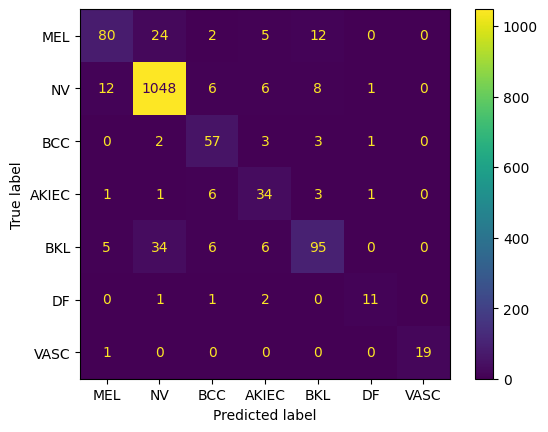

In [34]:
num_classes = 7

predlist = torch.zeros(0,dtype=torch.long, device='cpu')
lbllist = torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        model.eval()
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
        predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy()

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### Step 11: Train the Model with better validation robustness.
We plan to make spin validation dataset with random rotations and horizontal flip and then check the metrics again.

In [35]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 280)),
    torchvision.transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

              precision    recall  f1-score   support

         MEL       0.82      0.61      0.70       615
          NV       0.94      0.97      0.96      5405
         BCC       0.75      0.84      0.79       330
       AKIEC       0.65      0.73      0.69       230
         BKL       0.76      0.68      0.72       730
          DF       0.87      0.60      0.71        75
        VASC       0.97      0.95      0.96       100

    accuracy                           0.90      7485
   macro avg       0.82      0.77      0.79      7485
weighted avg       0.89      0.90      0.89      7485

AUC of class MEL = 0.9772771919858938
AUC of class NV = 0.9839956770796272
AUC of class BCC = 0.9922601274802533
AUC of class AKIEC = 0.9899457645401971
AUC of class BKL = 0.9724171846323879
AUC of class DF = 0.9949113810166441
AUC of class VASC = 0.9999702098849018


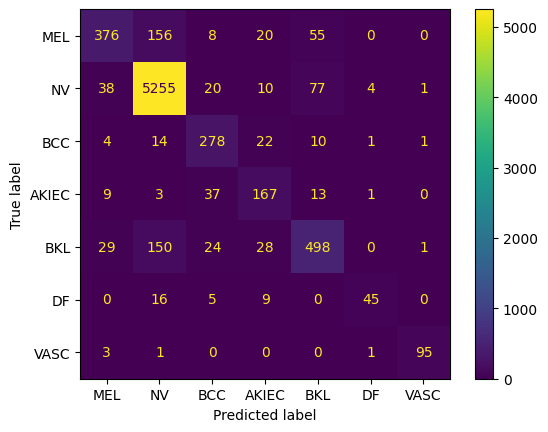

In [36]:
num_classes = 7

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
for n in range(5):
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(val_loader):
            model.eval()
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist=torch.cat([predlist,preds.view(-1).cpu()])
            lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
            predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy() 

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### Summary:
- In the end we were able to achieve 99% average F1 score for each class, and AUCs close to 100%!
- We could see that even on 2 classes with smallest representations (only 78 and 58 training images) we still were able to achieve 100 F1 score in both cases.
- We believe that the most important reason for the perfect result is well chosen data augmentations that helped not only to enrich our dataset, but also prevent overfitting.

#### References:
- https://datagen.tech/guides/computer-vision/resnet-50/
- https://viso.ai/deep-learning/resnet-residual-neural-network/
- https://www.kaggle.com/code/pmigdal/transfer-learning-with-resnet-50-in-pytorch

### **Model 4: YOLOv8n-CLS**

In [ ]:
# Load YOLOv8n model
model = YOLO('yolov8n-cls.pt')
# Load YOLOv8n model previously trained on HAM10000
#model = YOLO('best.pt')
#model = YOLO('last.pt')

100%|██████████| 5.28M/5.28M [00:00<00:00, 65.7MB/s]


In [ ]:
# Train the model for 30 epochs
# Results saved into 'runs/classify/train'
results = model.train(data='/skin', epochs=30, imgsz=(600,450))

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/skin, epochs=30, patience=50, batch=16, imgsz=(600, 450), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

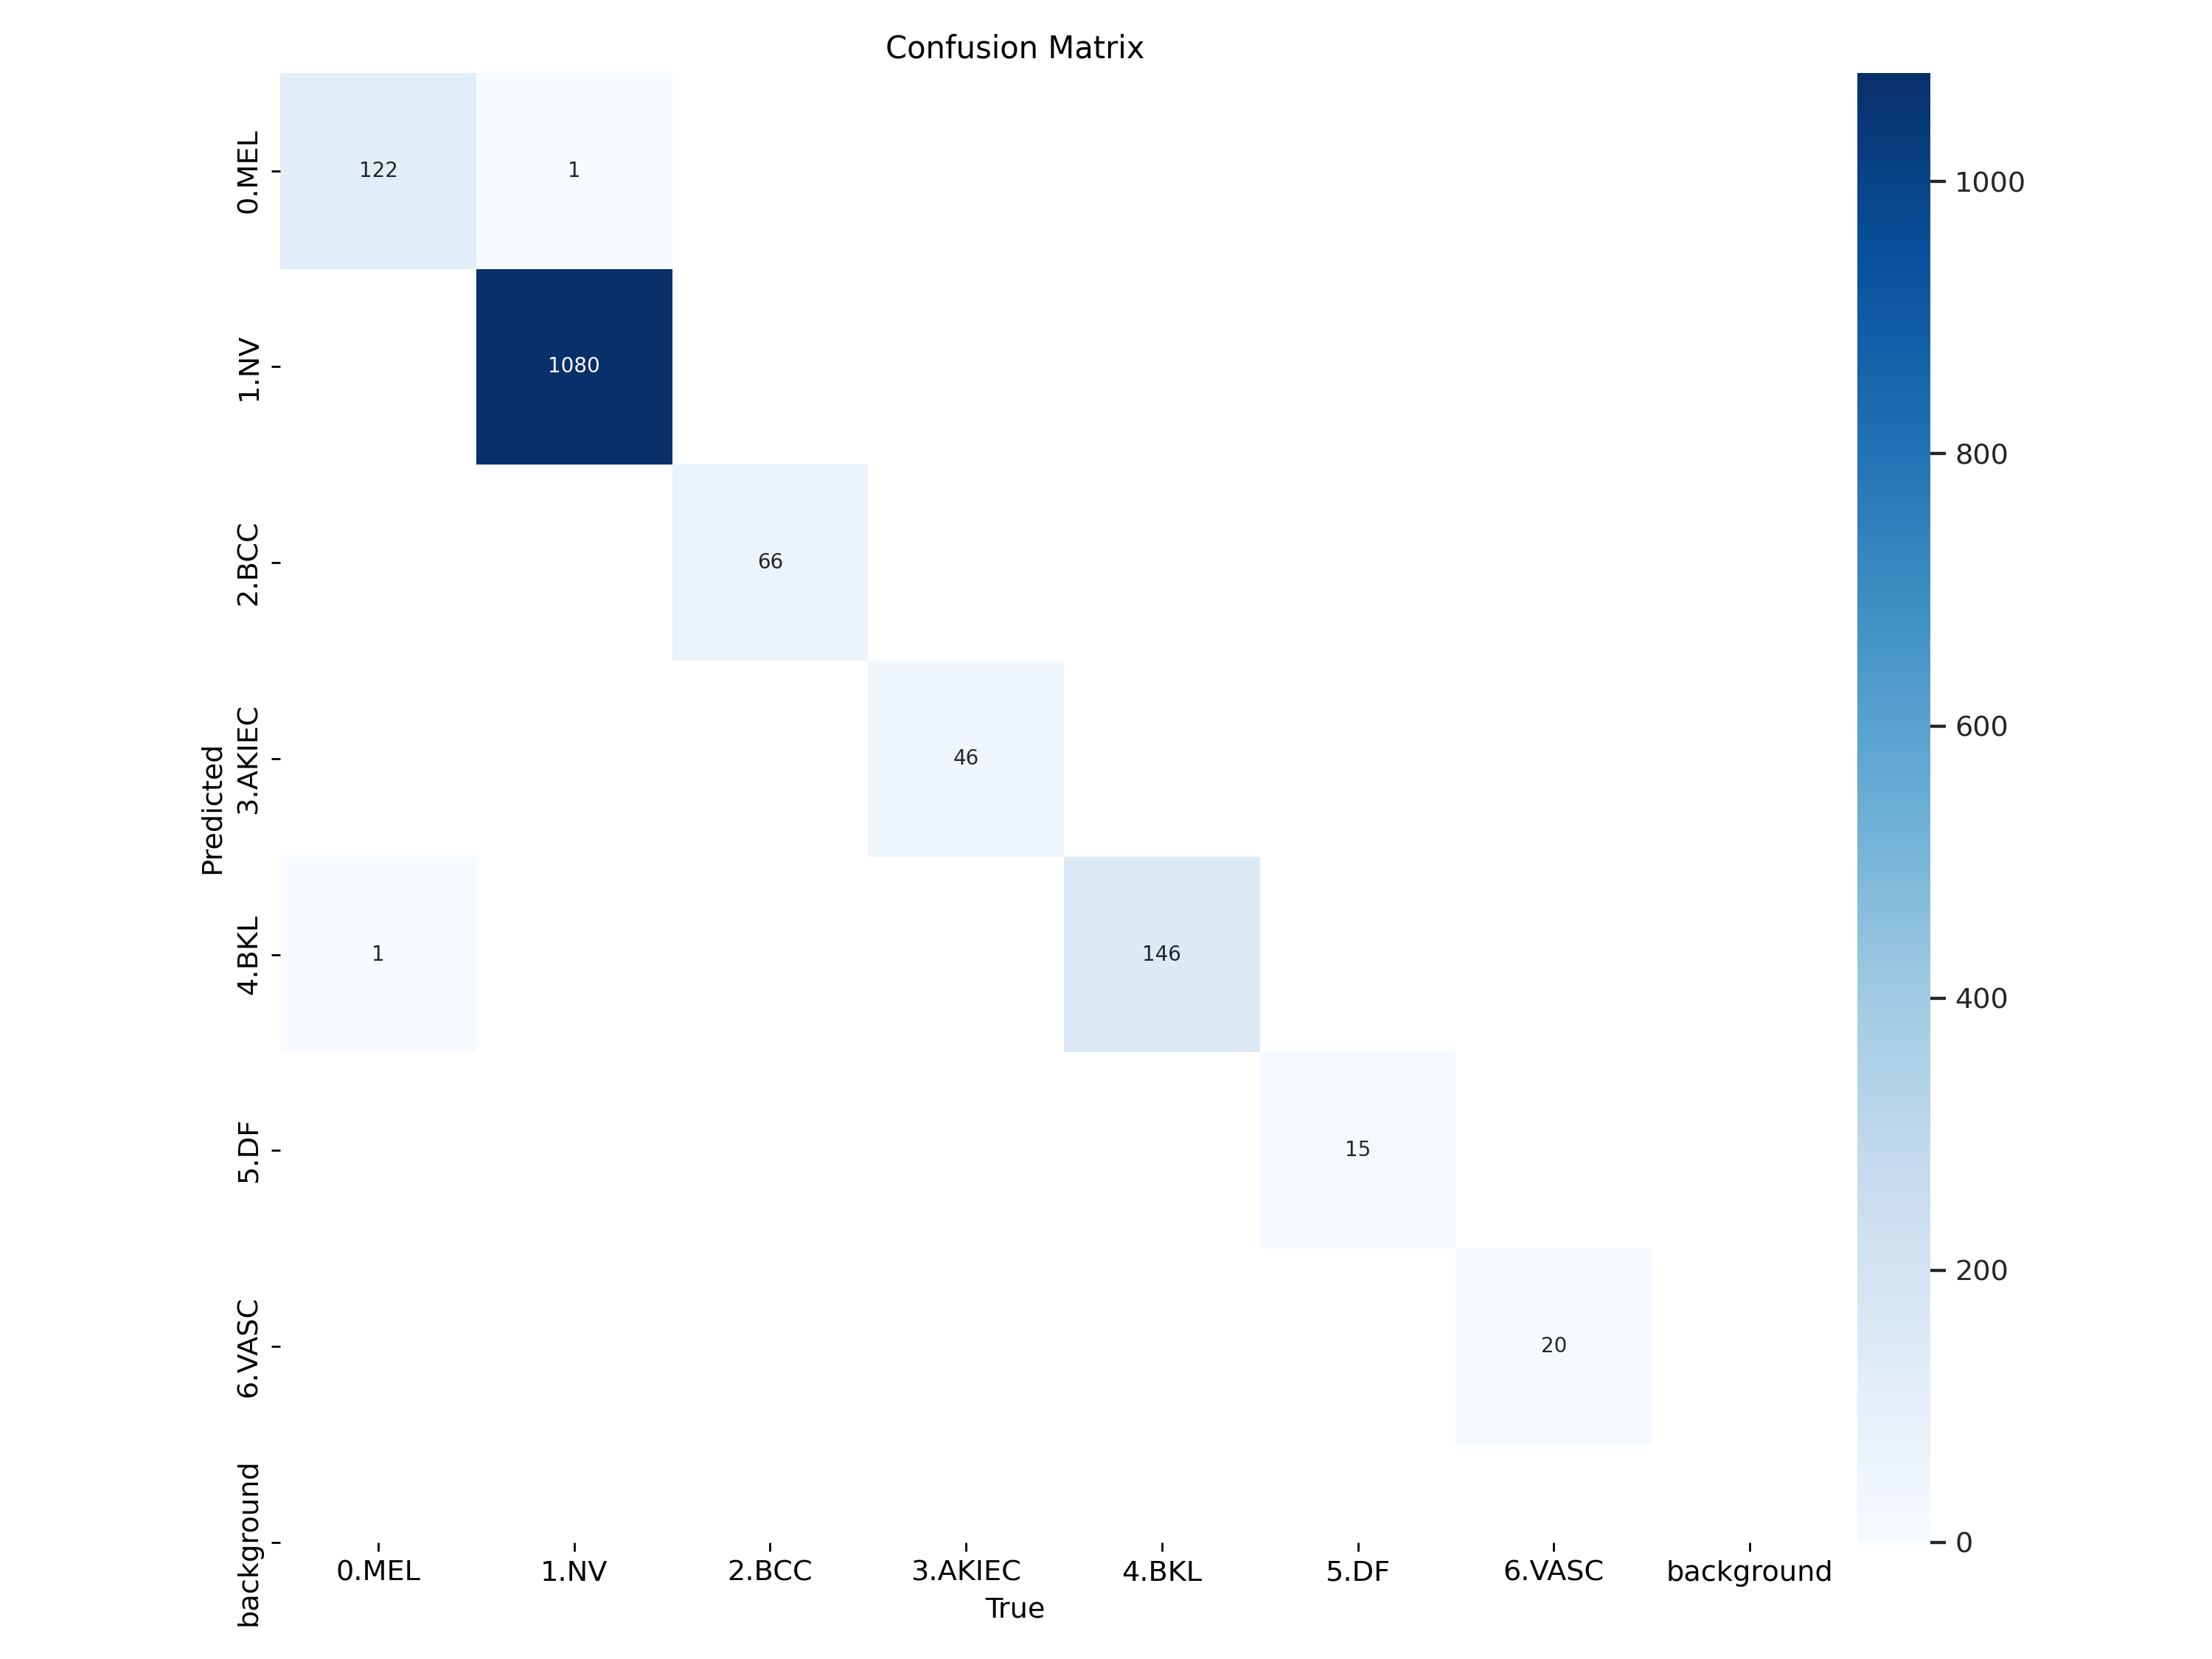

In [4]:
display.Image("confusion_matrix.png", width=600)

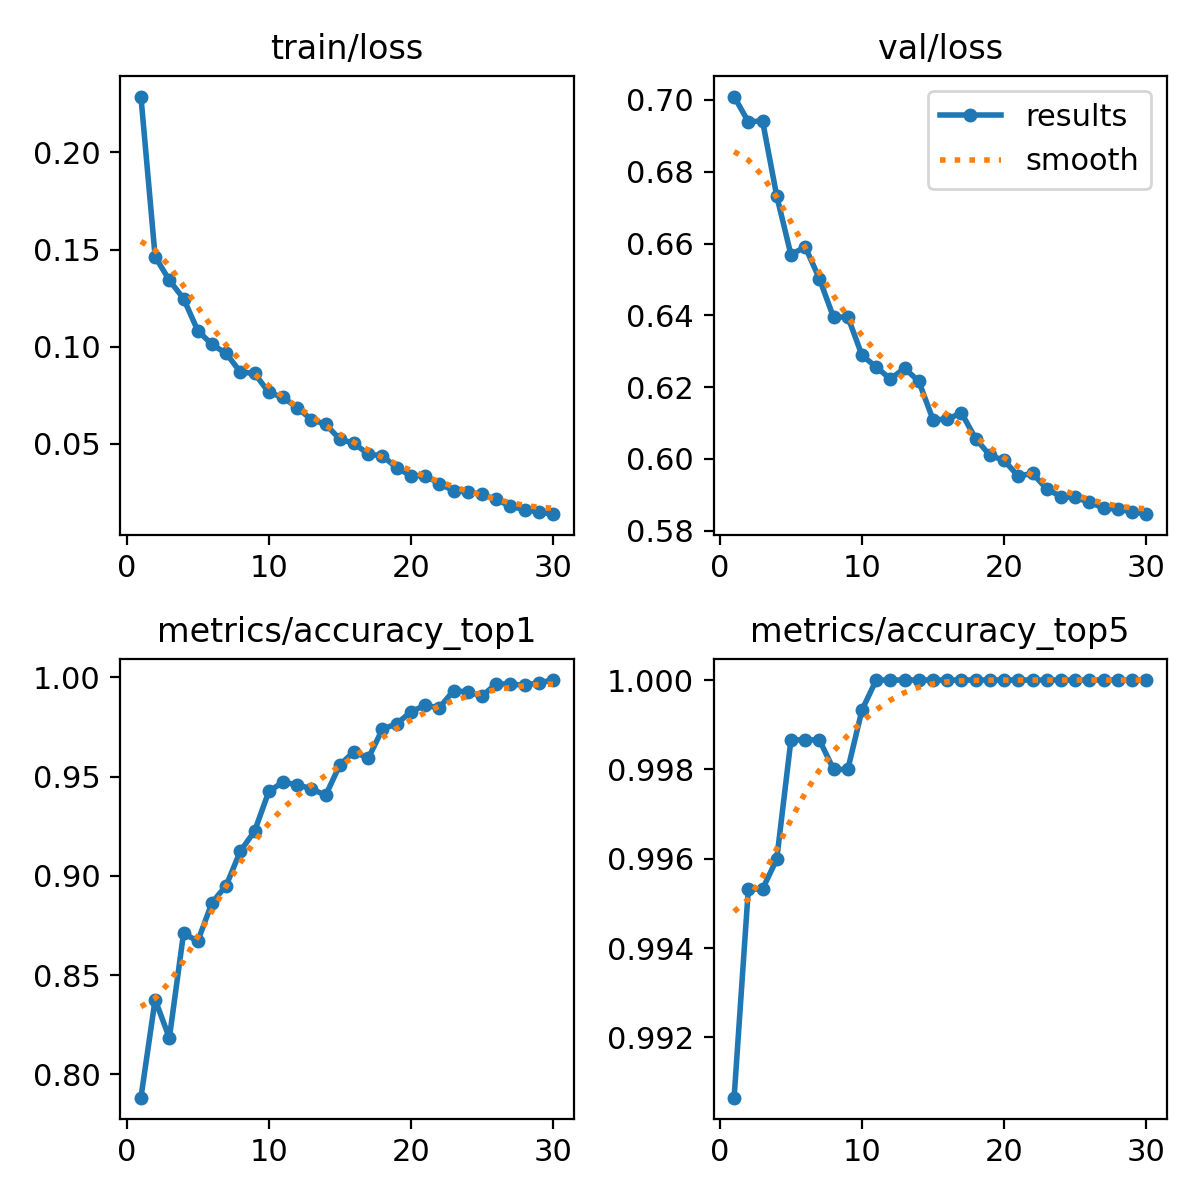

In [5]:
display.Image("results.png", width=600)

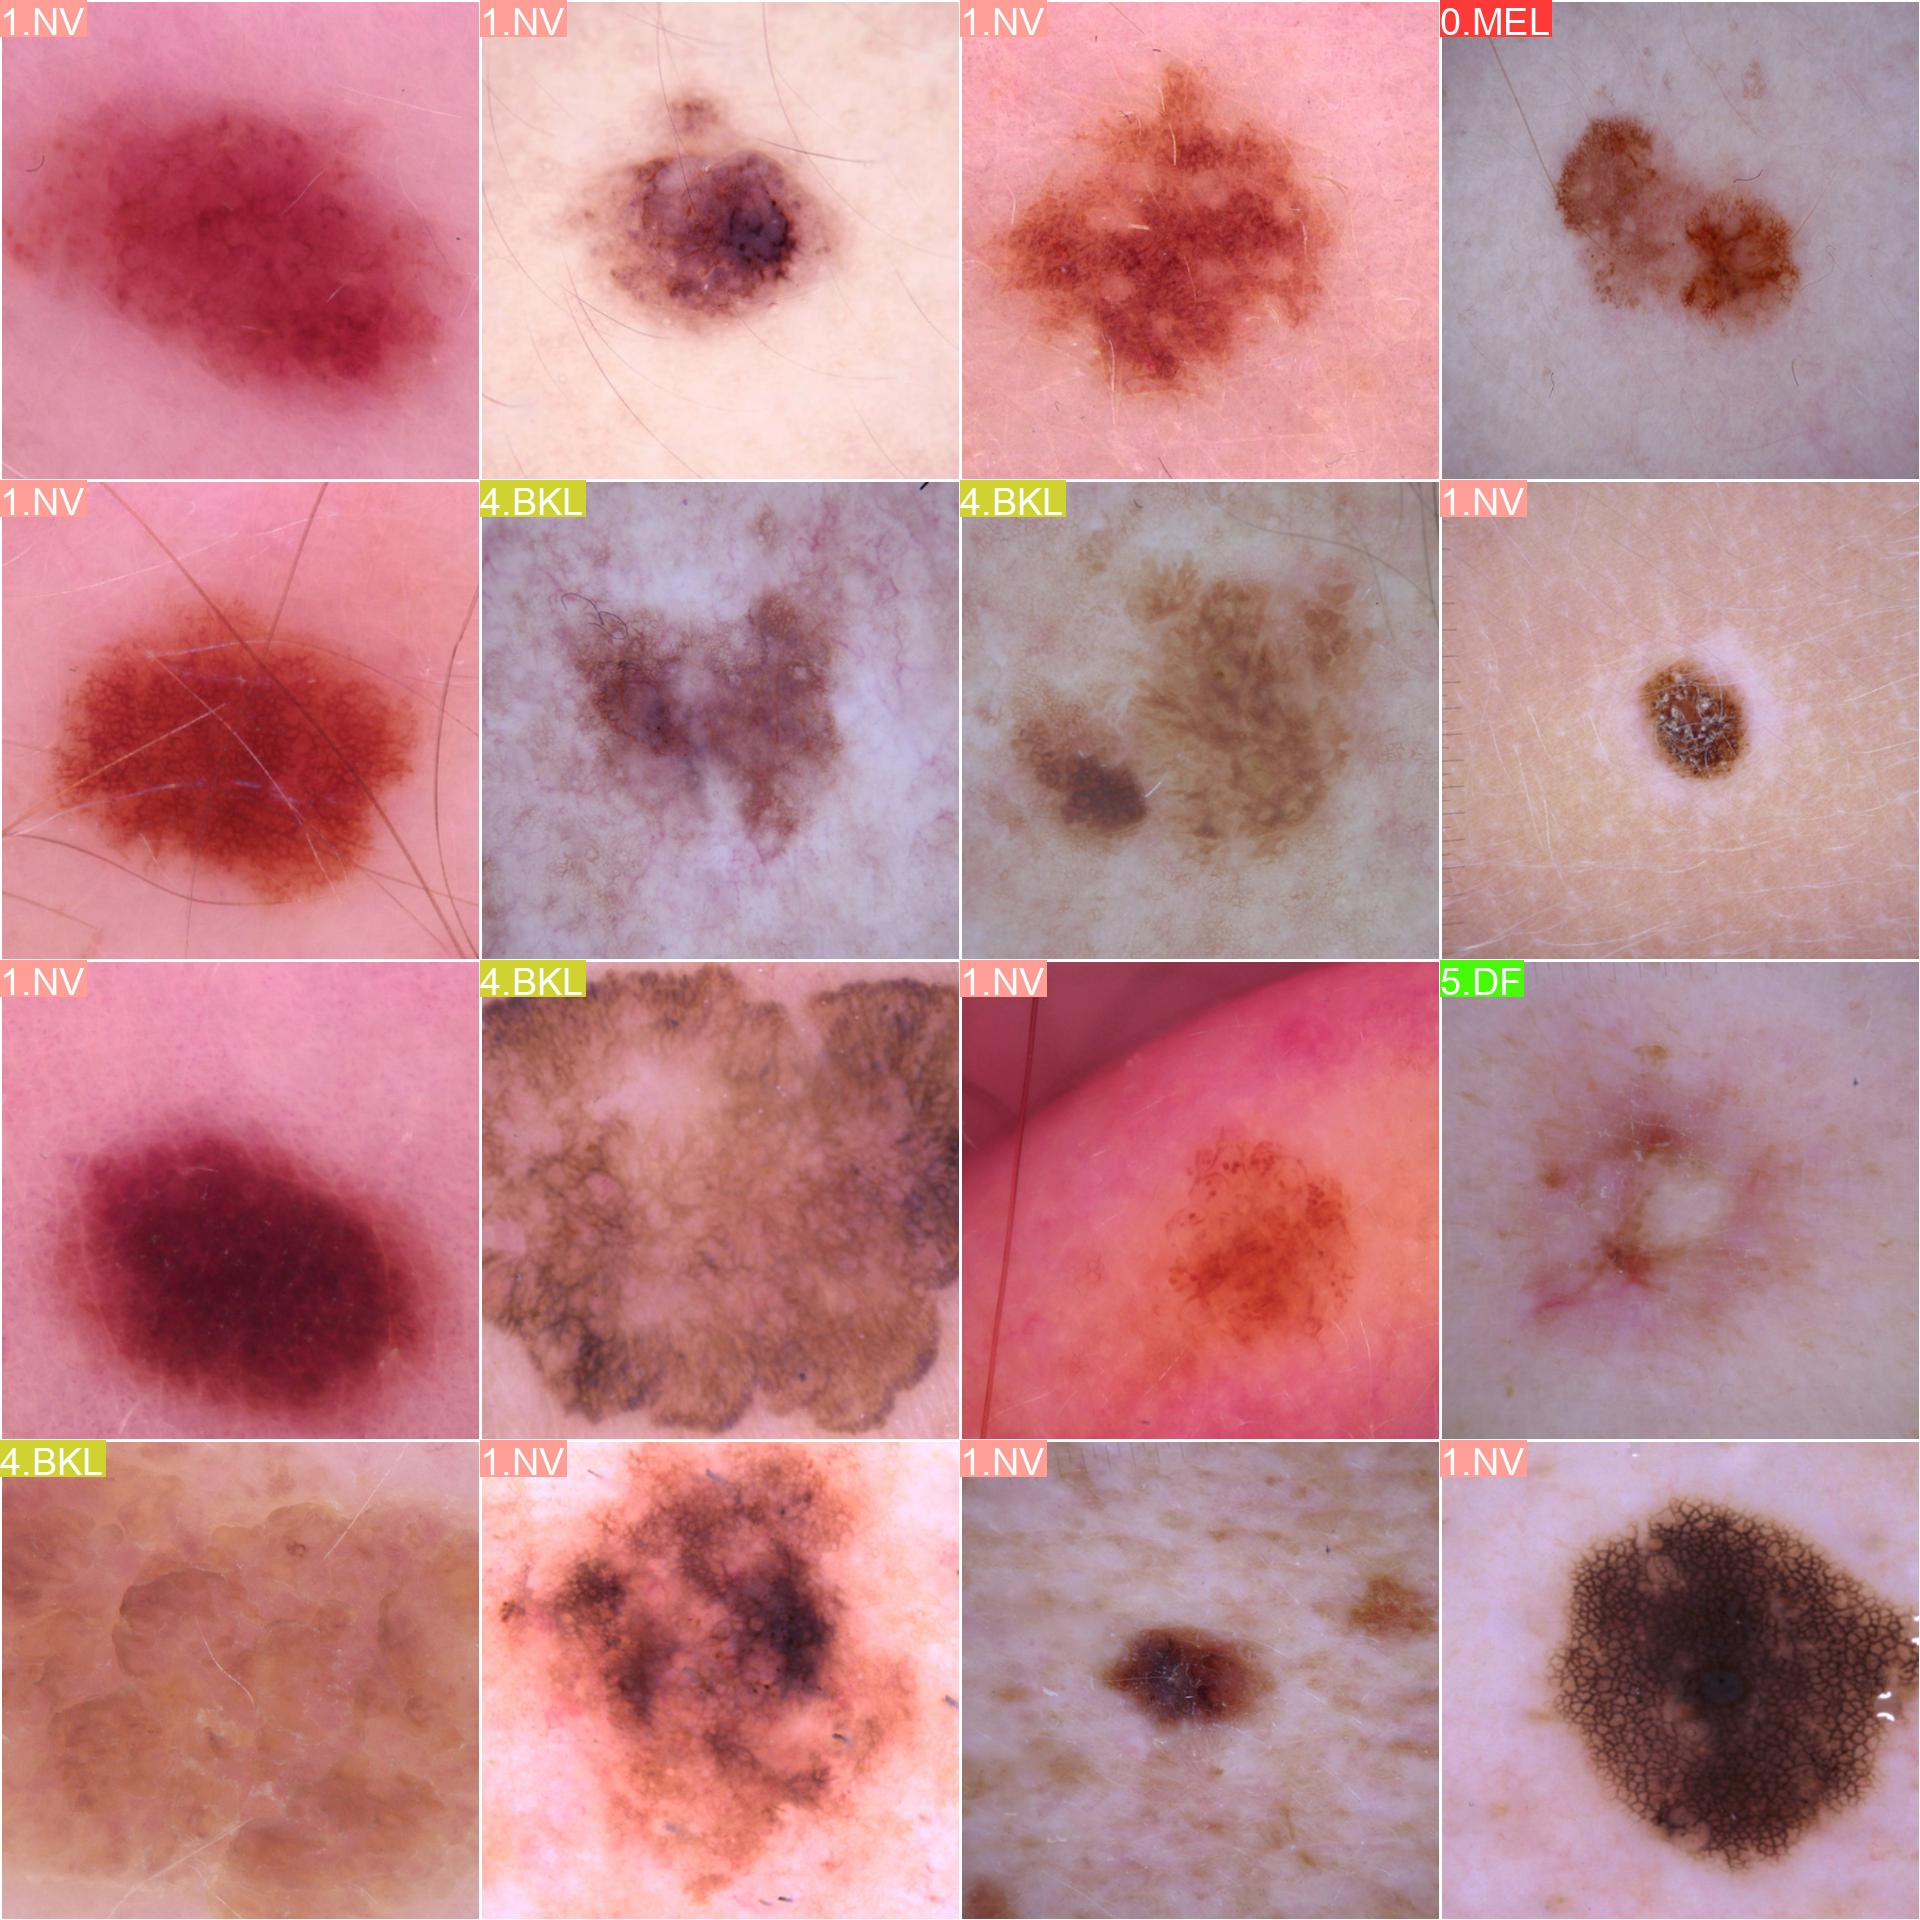

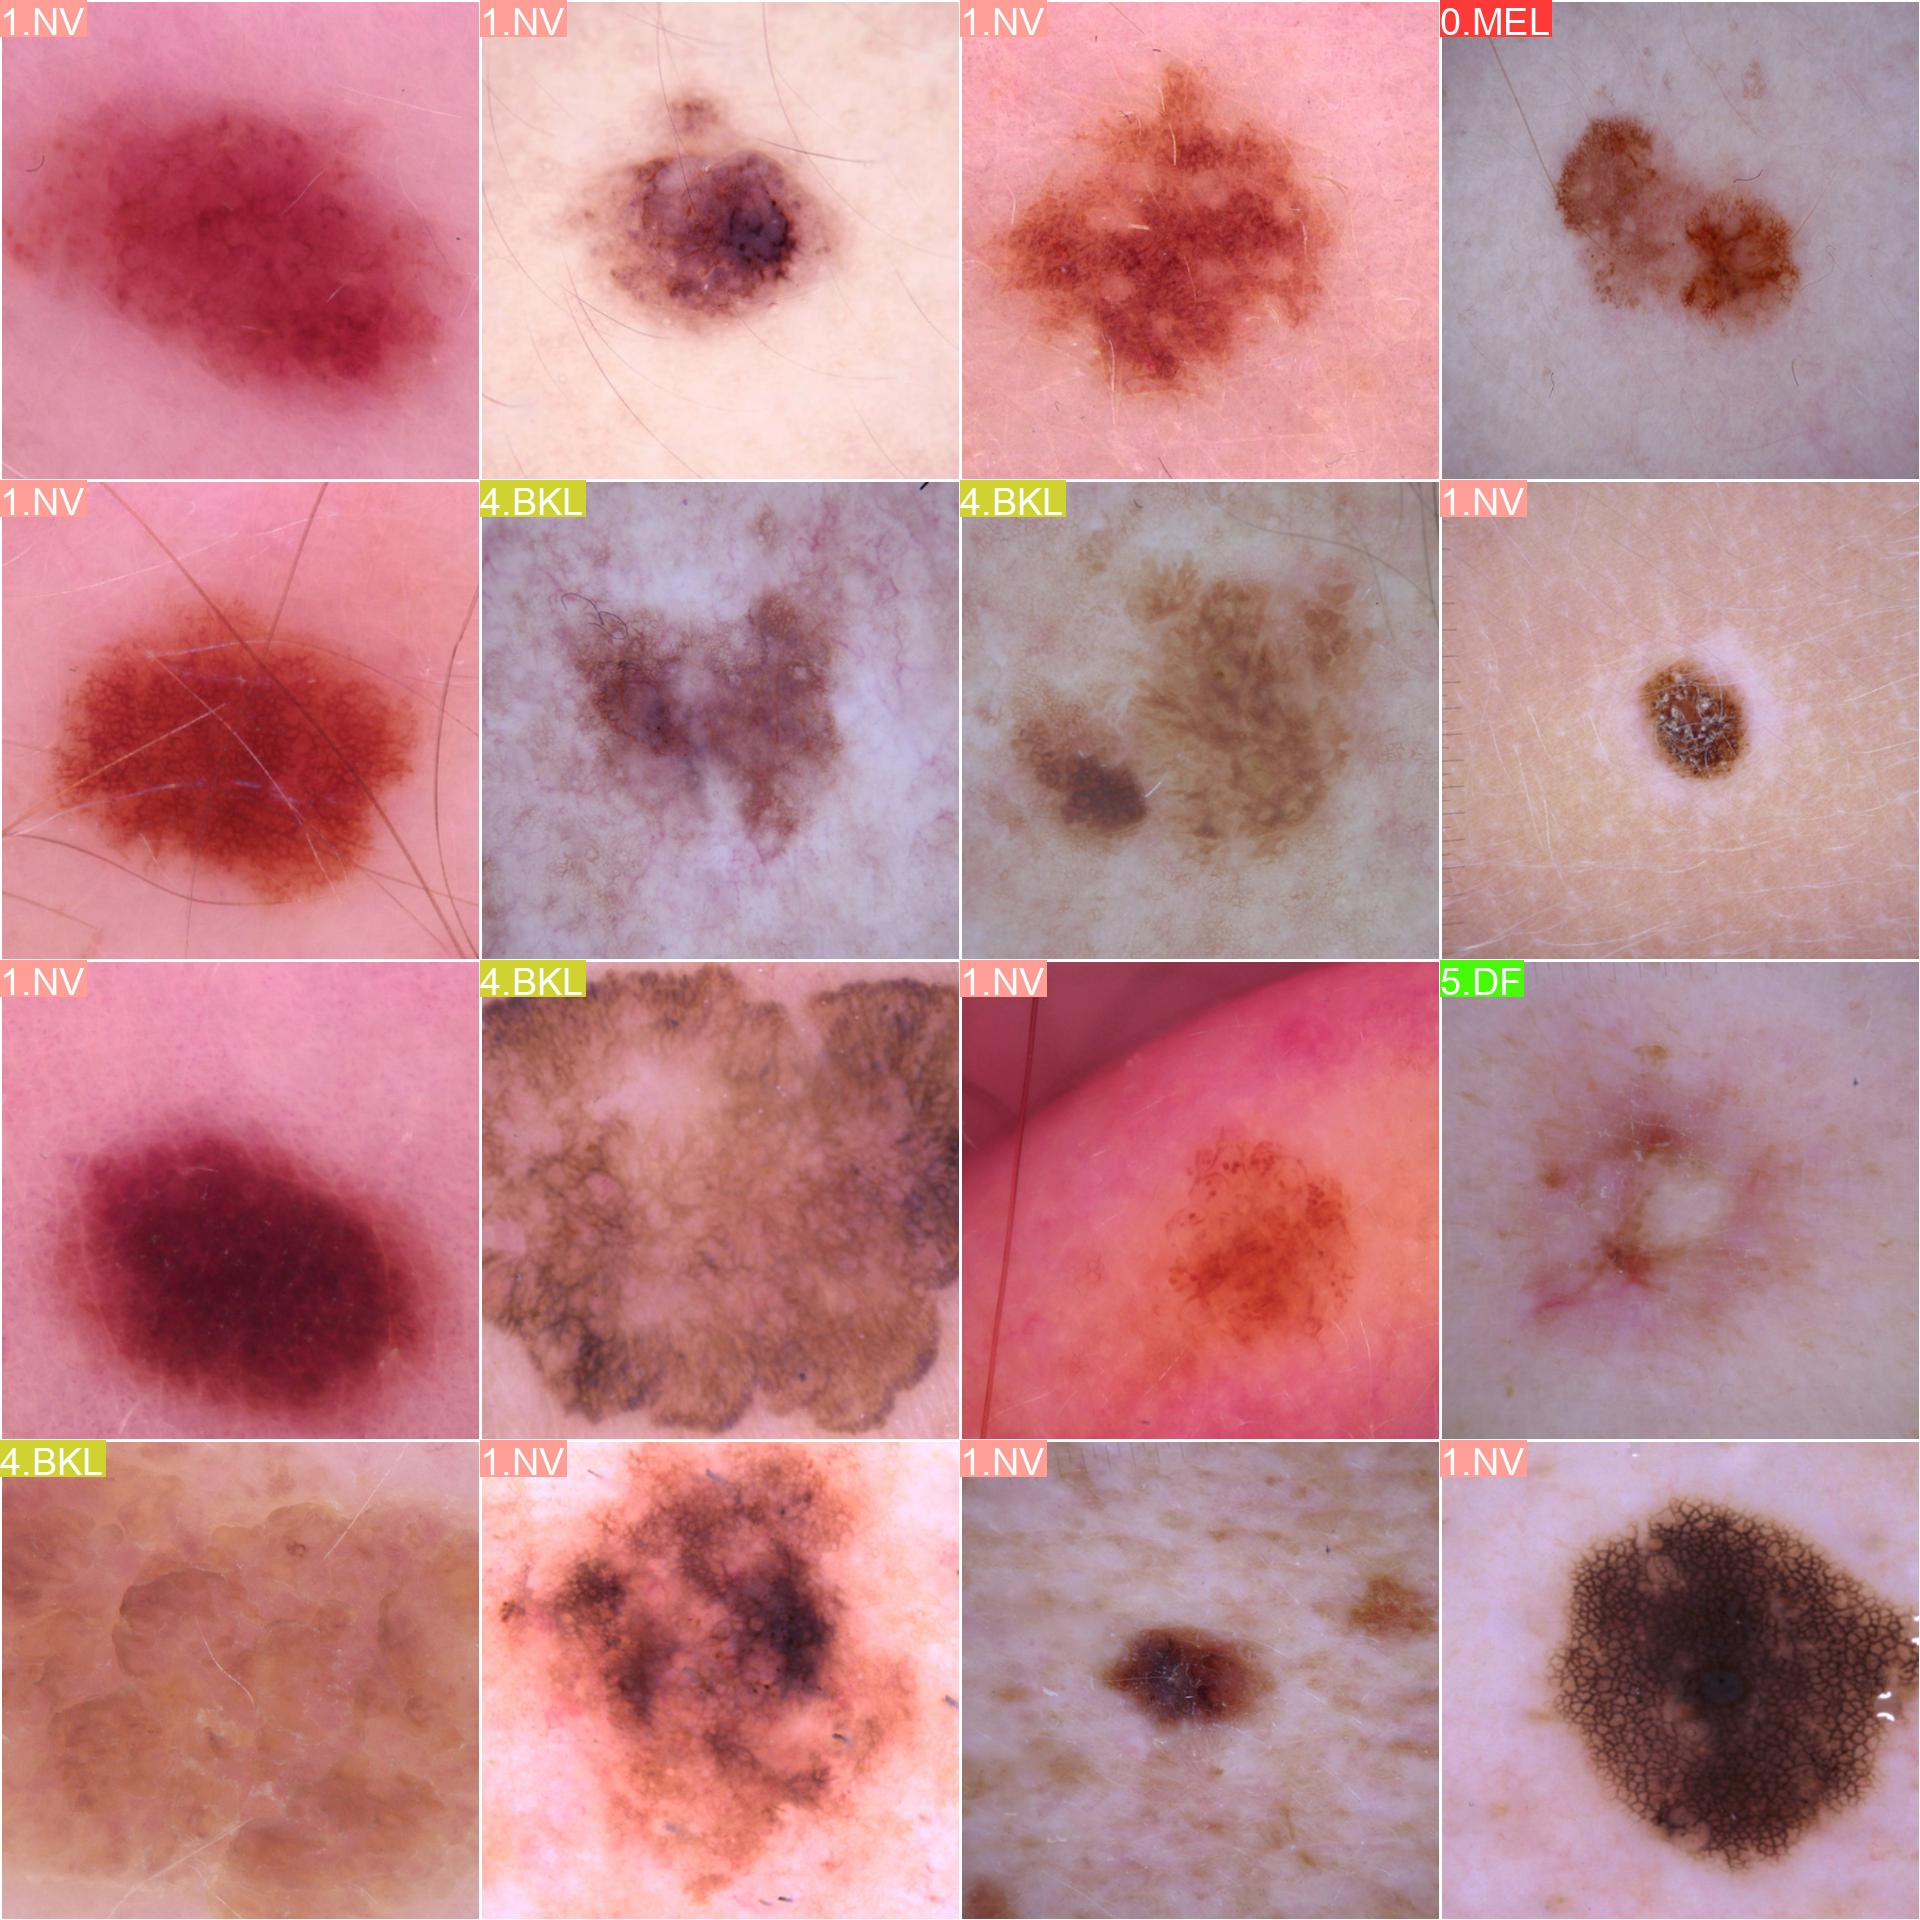

In [17]:
display(Image("val_batch1_labels.jpg", width=500), Image("val_batch1_pred.jpg", width=500))

### **Results**

### **Discussion**

### **References**

1. Department of Health and Welfare (2016), Skin Cancer (melanoma and non-melanoma skin cancers) in Australia. Available at https://www.aihw.gov.au/reports/cancer/skin-cancer-in-australia/summary